In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#Create set of random coordinates
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Add the coordinates to a list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
#Create list for citites
cities = []

#Identify nearest city for coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique, add to list of cities
    if city not in cities: 
        cities.append(city)

#Print length of city list
len(cities)

606

In [14]:
#Import datetime
from datetime import datetime

#Create empty list for weather data
city_data = []

#Print beginning of log
print("Beginning data retrieval")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through cities in list 
for i, city in enumerate(cities):
    #Group cities in sets of 50
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log URL, record, set num, city
    print(f"Processing record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    
    #Run API req for each city
    try:
    #Parse JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #Convert date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        #Append city info to city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #Skip errors
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate Data Loading complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval
-----------------------------
Processing record 1 of set 1 | vaini
Processing record 2 of set 1 | manokwari
Processing record 3 of set 1 | ancud
Processing record 4 of set 1 | severo-kurilsk
Processing record 5 of set 1 | upernavik
Processing record 6 of set 1 | jamestown
Processing record 7 of set 1 | belushya guba
City not found. Skipping...
Processing record 8 of set 1 | tuktoyaktuk
Processing record 9 of set 1 | mataura
Processing record 10 of set 1 | albany
Processing record 11 of set 1 | taolanaro
City not found. Skipping...
Processing record 12 of set 1 | kahului
Processing record 13 of set 1 | bur gabo
City not found. Skipping...
Processing record 14 of set 1 | nuuk
Processing record 15 of set 1 | puerto ayora
Processing record 16 of set 1 | rikitea
Processing record 17 of set 1 | ushuaia
Processing record 18 of set 1 | labytnangi
Processing record 19 of set 1 | nanakuli
Processing record 20 of set 1 | kamenskoye
City not found. Skipping...
Processing r

Processing record 36 of set 4 | sokolo
Processing record 37 of set 4 | kazalinsk
City not found. Skipping...
Processing record 38 of set 4 | anadyr
Processing record 39 of set 4 | nyurba
Processing record 40 of set 4 | caravelas
Processing record 41 of set 4 | port macquarie
Processing record 42 of set 4 | castro
Processing record 43 of set 4 | fairbanks
Processing record 44 of set 4 | arraial do cabo
Processing record 45 of set 4 | narsaq
Processing record 46 of set 4 | norman wells
Processing record 47 of set 4 | nova soure
Processing record 48 of set 4 | alampur
Processing record 49 of set 4 | alindao
Processing record 50 of set 4 | bani walid
Processing record 1 of set 5 | talcahuano
Processing record 2 of set 5 | tirumullaivasal
Processing record 3 of set 5 | dikson
Processing record 4 of set 5 | lar
Processing record 5 of set 5 | asfi
Processing record 6 of set 5 | kudahuvadhoo
Processing record 7 of set 5 | kieta
Processing record 8 of set 5 | apastovo
Processing record 9 of set

Processing record 23 of set 8 | san lawrenz
Processing record 24 of set 8 | tarakan
Processing record 25 of set 8 | satitoa
City not found. Skipping...
Processing record 26 of set 8 | cap malheureux
Processing record 27 of set 8 | bathsheba
Processing record 28 of set 8 | kuzhenkino
Processing record 29 of set 8 | fallingbostel
Processing record 30 of set 8 | gillette
Processing record 31 of set 8 | viligili
City not found. Skipping...
Processing record 32 of set 8 | saint anthony
Processing record 33 of set 8 | yangambi
Processing record 34 of set 8 | grandola
Processing record 35 of set 8 | mandal
Processing record 36 of set 8 | pascagoula
Processing record 37 of set 8 | yazman
Processing record 38 of set 8 | hayvoron
Processing record 39 of set 8 | mathathane
Processing record 40 of set 8 | alice springs
Processing record 41 of set 8 | vylgort
City not found. Skipping...
Processing record 42 of set 8 | hofn
Processing record 43 of set 8 | sangin
Processing record 44 of set 8 | sulan

Processing record 11 of set 12 | biak
Processing record 12 of set 12 | abu kamal
Processing record 13 of set 12 | haines junction
Processing record 14 of set 12 | ostersund
Processing record 15 of set 12 | steenwijk
Processing record 16 of set 12 | steyregg
Processing record 17 of set 12 | leningradskiy
Processing record 18 of set 12 | guerrero negro
Processing record 19 of set 12 | guarapari
Processing record 20 of set 12 | rietavas
Processing record 21 of set 12 | sept-iles
Processing record 22 of set 12 | moerai
Processing record 23 of set 12 | aykhal
Processing record 24 of set 12 | namatanai
Processing record 25 of set 12 | sao filipe
Processing record 26 of set 12 | zhaotong
Processing record 27 of set 12 | antofagasta
Processing record 28 of set 12 | bargal
City not found. Skipping...
Processing record 29 of set 12 | skagastrond
City not found. Skipping...
Processing record 30 of set 12 | trairi
Processing record 31 of set 12 | meyungs
City not found. Skipping...
Processing reco

In [15]:
len(city_data)

545

In [16]:
#Convert l-d to pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,64.56,100,40,2.30,TO,2021-05-26 17:23:00
1,Manokwari,-0.8667,134.0833,77.77,83,100,6.20,ID,2021-05-26 17:23:00
2,Ancud,-41.8697,-73.8203,54.93,97,100,8.90,CL,2021-05-26 17:23:01
3,Severo-Kurilsk,50.6789,156.1250,38.01,98,100,15.35,RU,2021-05-26 17:23:01
4,Upernavik,72.7868,-56.1549,32.79,86,64,9.69,GL,2021-05-26 17:23:01
5,Jamestown,42.0970,-79.2353,80.02,61,40,7.00,US,2021-05-26 17:22:14
6,Tuktoyaktuk,69.4541,-133.0374,28.40,80,75,6.91,CA,2021-05-26 17:23:02
7,Mataura,-46.1927,168.8643,33.44,85,36,3.27,NZ,2021-05-26 17:23:02
8,Albany,42.6001,-73.9662,89.92,51,41,3.00,US,2021-05-26 17:20:51
9,Kahului,20.8947,-156.4700,78.84,78,40,5.75,US,2021-05-26 17:22:34


In [17]:
#Reorder cols
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-05-26 17:23:00,-21.2000,-175.2000,64.56,100,40,2.30
1,Manokwari,ID,2021-05-26 17:23:00,-0.8667,134.0833,77.77,83,100,6.20
2,Ancud,CL,2021-05-26 17:23:01,-41.8697,-73.8203,54.93,97,100,8.90
3,Severo-Kurilsk,RU,2021-05-26 17:23:01,50.6789,156.1250,38.01,98,100,15.35
4,Upernavik,GL,2021-05-26 17:23:01,72.7868,-56.1549,32.79,86,64,9.69
5,Jamestown,US,2021-05-26 17:22:14,42.0970,-79.2353,80.02,61,40,7.00
6,Tuktoyaktuk,CA,2021-05-26 17:23:02,69.4541,-133.0374,28.40,80,75,6.91
7,Mataura,NZ,2021-05-26 17:23:02,-46.1927,168.8643,33.44,85,36,3.27
8,Albany,US,2021-05-26 17:20:51,42.6001,-73.9662,89.92,51,41,3.00
9,Kahului,US,2021-05-26 17:22:34,20.8947,-156.4700,78.84,78,40,5.75


In [20]:
#Create output file path
output_path = "weather_data/cities.csv"

#Export city_data
city_data_df.to_csv(output_path, index_label = "City_ID")

In [21]:
# Extract relevant fields for plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

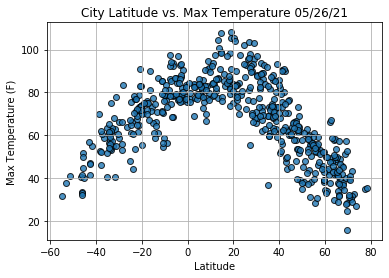

In [25]:
#Import time lib and get today's date
import time
today = time.strftime("%x")

#Build scatter for lat v. temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig1.png")

plt.show()

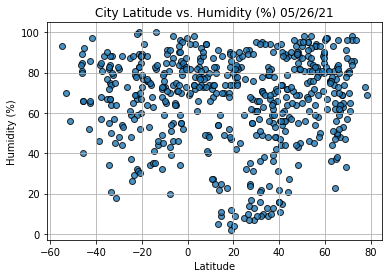

In [29]:
#Build scatter for lat v. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Humidity (%) {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig2.png")

plt.show()

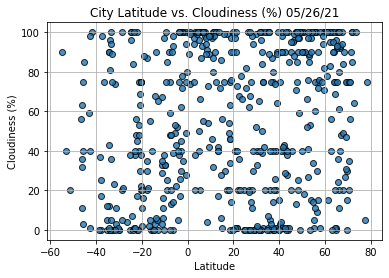

In [30]:
#Build scatter for lat v. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Cloudiness (%) {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig3.png")

plt.show()

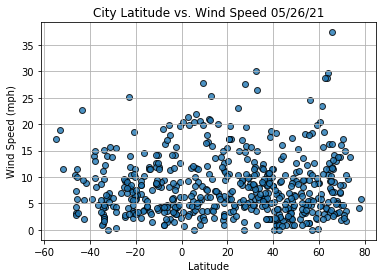

In [31]:
#Build scatter for lat v. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1,
            marker = "o", alpha = .8, label = "Cities")

#Format plot
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

#Save fig
plt.savefig("weather_data/Fig4.png")

plt.show()